### Total Annual LA Out Migration Counts
*Contains 4 plots of the same data

In [1]:
import pandas as pd
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
numbers = {}
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    count = df.PERWT.sum()
    numbers[year] = count

In [4]:
df = pd.DataFrame.from_dict(numbers, orient='index')
df = df.reset_index()
df = df.rename({'index':'Year', 0:'Count'}, axis=1)
yr = df.Year.astype('str')
df.Year = pd.to_datetime(yr)

In [5]:
base = alt.Chart(df).encode(
    x=alt.X('Year', axis=alt.Axis(labelFlush=False, grid=False), title=None),
    y=alt.Y('Count', scale=alt.Scale(domain=[200000,500000]), title=None)
).properties(title='LA Metro Out Migration Counts', width=500).configure_view(strokeWidth=0)

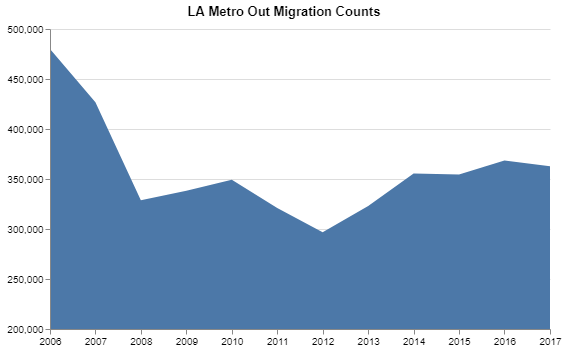

In [6]:
base.mark_area()

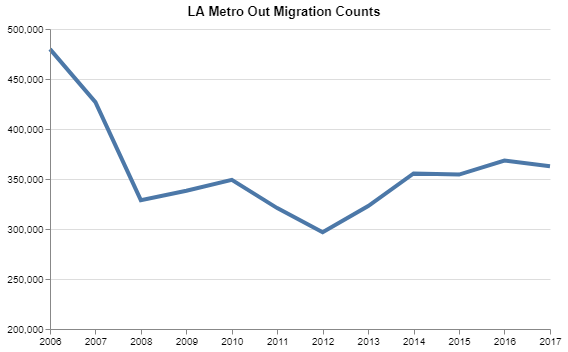

In [7]:
base.mark_line(strokeWidth=4)

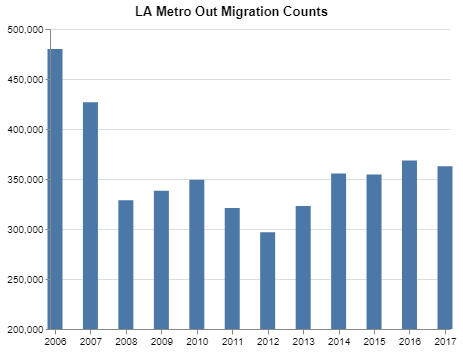

In [8]:
base.mark_bar(size=15).properties(width=400)

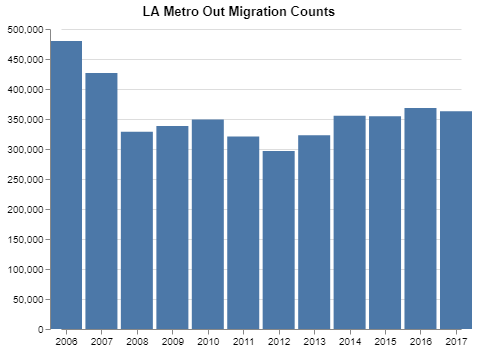

In [10]:
base.mark_bar(size=32).encode(y=alt.Y('Count', title=None, axis=alt.Axis(offset=11))).properties(width=400)